Perform logistic regression to classify if a patient has a benign tumor or malignant tumor (cancer) based on the features provided. Generate the confusion matrix and evaluate the quality of the model by computing relevant performance metrics including Precision, Recall, accuracy, F1-Score etc. Plot the ROC curve and calculate AUC.


In [1]:
from google.colab import files
uploaded = files.upload()

Saving samples_cancer.csv to samples_cancer.csv


In [2]:
%matplotlib inline
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('samples_cancer.csv')
data = data.replace('?', pd.NA)
data = data.dropna()
data['BareNuc'] = pd.to_numeric(data['BareNuc'])

print("Data loaded and cleaned successfully.")
print(data.info())

Data loaded and cleaned successfully.
<class 'pandas.core.frame.DataFrame'>
Index: 683 entries, 0 to 698
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   ID           683 non-null    int64
 1   Clump        683 non-null    int64
 2   UnifSize     683 non-null    int64
 3   UnifShape    683 non-null    int64
 4   MargAdh      683 non-null    int64
 5   SingEpiSize  683 non-null    int64
 6   BareNuc      683 non-null    int64
 7   BlandChrom   683 non-null    int64
 8   NormNucl     683 non-null    int64
 9   Mit          683 non-null    int64
 10  Class        683 non-null    int64
dtypes: int64(11)
memory usage: 64.0 KB
None


In [4]:
X = data.drop(['ID', 'Class'], axis=1)
y = data['Class'].map({2:0, 4:1})

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

print("Model training complete.")

Model training complete.


In [6]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]

print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")
print("\n--- Confusion Matrix ---")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9562
Precision: 0.9815
Recall: 0.9138
F1-Score: 0.9464

--- Confusion Matrix ---
[[78  1]
 [ 5 53]]



Area Under Curve (AUC): 0.9976


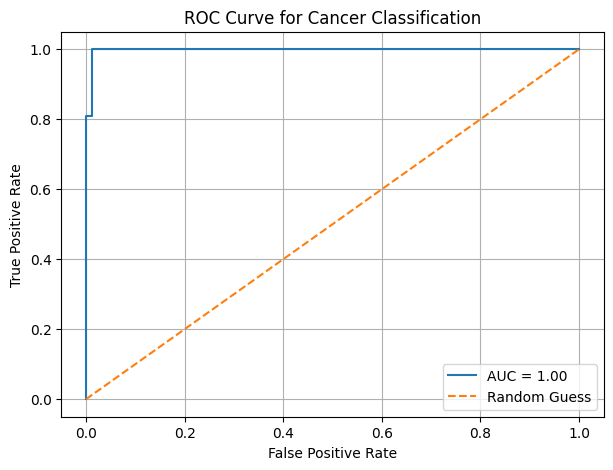

In [7]:
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

print(f"\nArea Under Curve (AUC): {roc_auc:.4f}")

plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0,1],[0,1],'--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Cancer Classification')
plt.legend()
plt.grid(True)
plt.show()